# <center>SW Sphere</center>

In [2]:
import torch
import time
import sys
import ot

import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

from scipy.special import iv, gamma

sys.path.append("../lib")
from sw_sphere import sliced_wasserstein_sphere, sliced_wasserstein_sphere_unif
from utils_sphere import *
from utils_vmf import *

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

### Test SW Von Mises-Fisher

#### SW

##### Influence $\kappa$ + Dimension

3
25
50
100


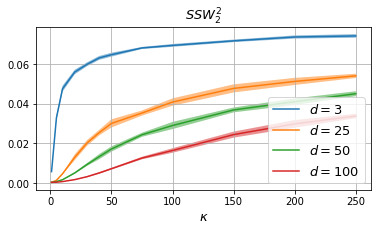

In [ ]:
fig = plt.figure(figsize=(6,3))


for d in [3,25,50,100]:
    print(d)

    x0 = torch.randn((500,d), device=device)
    x0 = F.normalize(x0, p=2, dim=-1)

    kappas = [1,5,10,20,30,40,50,75,100,150,200,250]
    mus = np.ones((len(kappas),d))

    L = np.zeros((len(kappas), 10))

    for k in range(len(kappas)):
        mu = mus[k]
        mu = mu/np.linalg.norm(mu)
        x1 = rand_von_mises_fisher(mu,kappa=kappas[k],N=500)

        for j in range(10):
            sw = sliced_wasserstein_sphere(x0, torch.tensor(x1, dtype=torch.float, device=device), 100, device)
            L[k, j] = sw

    m = np.mean(L, axis=-1)
    s = np.std(L, axis=-1)
    plt.plot(kappas, m, label=r"$d=$"+str(d)) # + r" $\mu=$["+str(mu[0])+","+str(mu[1])+","+str(mu[2])+"]")
    plt.fill_between(kappas, m-s, m+s,alpha=0.5)
    

plt.xlabel(r"$\kappa$", fontsize=13)
plt.title(r"$SSW_2^2$", fontsize=13) # rotation=0, labelpad=20, fontsize=13)
plt.grid(True)
plt.legend(fontsize=13)
plt.savefig("./SW_vMF.pdf", format="pdf", bbox_inches="tight")
plt.show()

3
25
50
100


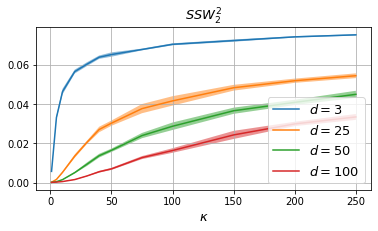

In [4]:
fig = plt.figure(figsize=(6,3))


for d in [3,25,50,100]:
    print(d)

    kappas = [1,5,10,20,30,40,50,75,100,150,200,250]
    mus = np.ones((len(kappas),d))

    L = np.zeros((len(kappas), 10))

    for k in range(len(kappas)):
        mu = mus[k]
        mu = mu/np.linalg.norm(mu)
        x1 = rand_von_mises_fisher(mu,kappa=kappas[k],N=500)

        for j in range(10):
            sw = sliced_wasserstein_sphere_unif(torch.tensor(x1, dtype=torch.float, device=device), 100, device)
            L[k, j] = sw

    m = np.mean(L, axis=-1)
    s = np.std(L, axis=-1)
    plt.plot(kappas, m, label=r"$d=$"+str(d)) # + r" $\mu=$["+str(mu[0])+","+str(mu[1])+","+str(mu[2])+"]")
    plt.fill_between(kappas, m-s, m+s,alpha=0.5)
    

plt.xlabel(r"$\kappa$", fontsize=13)
plt.title(r"$SSW_2^2$", fontsize=13) # rotation=0, labelpad=20, fontsize=13)
plt.grid(True)
plt.legend(fontsize=13)
plt.savefig("./SW_vMF.pdf", format="pdf", bbox_inches="tight")
plt.show()

##### Rotation Around Circle

###### $SSW_2^2$

3
25
50


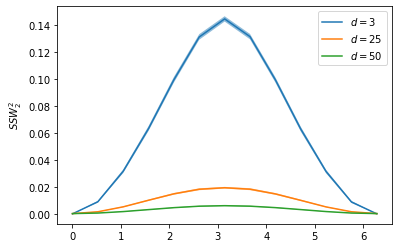

In [ ]:
kappa = 10    

ds = [3, 25, 50]

L = np.zeros((len(ds), len(mus), 100))

thetas = [0,np.pi/6,np.pi/3,np.pi/2,2*np.pi/3,5*np.pi/6,np.pi,
            -5*np.pi/6,-2*np.pi/3,-np.pi/2,-np.pi/3,-np.pi/6, 0]
thetas = np.array(thetas)%(2*np.pi)

thetas[-1] = 2*np.pi



for i, d in enumerate(ds):
    print(d)
    
    mu_target = np.zeros((d,))
    mu_target[0] = 1
    
    v = np.zeros((d,))
    v[1] = 1

    mus = []
    for theta in thetas:
        mus.append(np.zeros((d,)))
        mus[-1][0] = np.cos(theta)
        mus[-1][1] = np.sin(theta)
        # mus.append([np.cos(theta), np.sin(theta), 0])    
        
    for k in range(len(mus)):
        mu = np.array(mus[k])
        
        for j in range(100):
            x0 = rand_von_mises_fisher(mu_target, kappa=10, N=500)
            x1 = rand_von_mises_fisher(mu, kappa=10, N=500)
            sw = sliced_wasserstein_sphere(torch.tensor(x0, dtype=torch.float, device=device), 
                                           torch.tensor(x1, dtype=torch.float, device=device), 
                                           1000, device, p=2)
            L[i, k, j] = sw

    m = np.mean(L[i], axis=-1)
    s = np.std(L[i], axis=-1)
    plt.plot(thetas, m, label=r"$d=$"+str(d))
    plt.fill_between(thetas, m-s, m+s,alpha=0.5)
    
plt.ylabel(r"$SSW_2^2$")
plt.legend()
plt.show()

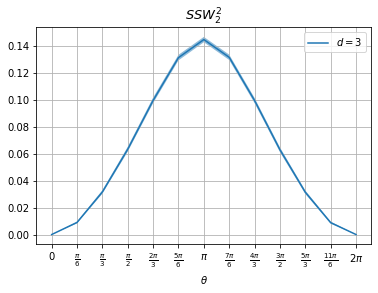

In [ ]:
m = np.mean(L[0], axis=-1)
s = np.std(L[0], axis=-1)

plt.plot(thetas*180/np.pi, m, label=r"$d=$"+str(ds[0])) # + r" $\mu=$["+str(mu[0])+","+str(mu[1])+","+str(mu[2])+"]")
plt.fill_between(thetas*180/np.pi, m-s, m+s,alpha=0.5)

plt.xlabel(r"$\theta$")
# plt.xticks(thetas*180/np.pi)
labels = ["0", r"$\frac{\pi}{6}$", r"$\frac{\pi}{3}$", r"$\frac{\pi}{2}$", r"$\frac{2\pi}{3}$", r"$\frac{5\pi}{6}$",
           r"$\pi$", r"$\frac{7\pi}{6}$", r"$\frac{4\pi}{3}$", r"$\frac{3\pi}{2}$", r"$\frac{5\pi}{3}$",
           r"$\frac{11\pi}{6}$", r"$2\pi$"]
plt.xticks(180*thetas/np.pi, labels, fontsize=10)
plt.title(r"$SSW_2^2$", fontsize=13)
plt.grid(True)
plt.legend()
plt.show()

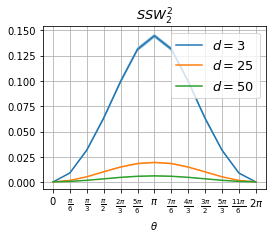

In [ ]:
fig = plt.figure(figsize=(4,3))

for i, d in enumerate(ds):
    m = np.mean(L[i], axis=-1)
    s = np.std(L[i], axis=-1)
    plt.plot(thetas*180/np.pi, m, label=r"$d=$"+str(d)) # + r" $\mu=$["+str(mu[0])+","+str(mu[1])+","+str(mu[2])+"]")
    plt.fill_between(thetas*180/np.pi, m-s, m+s,alpha=0.5)

    plt.xlabel(r"$\theta$") #, fontsize=13)
    labels = ["0", r"$\frac{\pi}{6}$", r"$\frac{\pi}{3}$", r"$\frac{\pi}{2}$", r"$\frac{2\pi}{3}$", r"$\frac{5\pi}{6}$",
            r"$\pi$", r"$\frac{7\pi}{6}$", r"$\frac{4\pi}{3}$", r"$\frac{3\pi}{2}$", r"$\frac{5\pi}{3}$",
            r"$\frac{11\pi}{6}$", r"$2\pi$"]
    plt.xticks(180*thetas/np.pi, labels, fontsize=10)

# ax.set_xticklabels(label)
# plt.ylabel(r"$SSW_2^2$", fontsize=13, rotation=0, labelpad=20)
plt.title(r"$SSW_2^2$", fontsize=13)

plt.grid(True)
plt.legend(fontsize=13)
plt.savefig("./SSW_vMF_mus_ds.pdf", format="pdf", bbox_inches="tight")
plt.show()

###### $SSW_1$

3
25
50


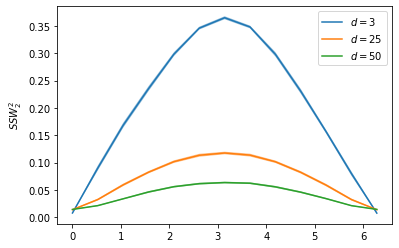

In [ ]:
kappa = 10    

ds = [3, 25, 50]

L = np.zeros((len(ds), len(mus), 100))

thetas = [0,np.pi/6,np.pi/3,np.pi/2,2*np.pi/3,5*np.pi/6,np.pi,
            -5*np.pi/6,-2*np.pi/3,-np.pi/2,-np.pi/3,-np.pi/6, 0]
thetas = np.array(thetas)%(2*np.pi)

thetas[-1] = 2*np.pi



for i, d in enumerate(ds):
    print(d)
    
    mu_target = np.zeros((d,))
    mu_target[0] = 1
    
    v = np.zeros((d,))
    v[1] = 1

    mus = []
    for theta in thetas:
        mus.append(np.zeros((d,)))
        mus[-1][0] = np.cos(theta)
        mus[-1][1] = np.sin(theta)
        # mus.append([np.cos(theta), np.sin(theta), 0])    
        
    for k in range(len(mus)):
        mu = np.array(mus[k])
        
        for j in range(100):
            x0 = rand_von_mises_fisher(mu_target, kappa=10, N=500)
            x1 = rand_von_mises_fisher(mu, kappa=10, N=500)
            sw = sliced_wasserstein_sphere(torch.tensor(x0, dtype=torch.float, device=device), 
                                           torch.tensor(x1, dtype=torch.float, device=device), 
                                           1000, device, p=1)
            L[i, k, j] = sw

    m = np.mean(L[i], axis=-1)
    s = np.std(L[i], axis=-1)
    plt.plot(thetas, m, label=r"$d=$"+str(d))
    plt.fill_between(thetas, m-s, m+s,alpha=0.5)
    
plt.ylabel(r"$SSW_2^2$")
plt.legend()
plt.show()

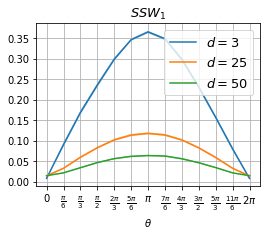

In [ ]:
fig = plt.figure(figsize=(4,3))

for i, d in enumerate(ds):
    m = np.mean(L[i], axis=-1)
    s = np.std(L[i], axis=-1)
    plt.plot(thetas*180/np.pi, m, label=r"$d=$"+str(d)) # + r" $\mu=$["+str(mu[0])+","+str(mu[1])+","+str(mu[2])+"]")
    plt.fill_between(thetas*180/np.pi, m-s, m+s,alpha=0.5)

    plt.xlabel(r"$\theta$") #, fontsize=13)
    labels = ["0", r"$\frac{\pi}{6}$", r"$\frac{\pi}{3}$", r"$\frac{\pi}{2}$", r"$\frac{2\pi}{3}$", r"$\frac{5\pi}{6}$",
            r"$\pi$", r"$\frac{7\pi}{6}$", r"$\frac{4\pi}{3}$", r"$\frac{3\pi}{2}$", r"$\frac{5\pi}{3}$",
            r"$\frac{11\pi}{6}$", r"$2\pi$"]
    plt.xticks(180*thetas/np.pi, labels, fontsize=10)

# ax.set_xticklabels(label)
# plt.ylabel(r"$SSW_2^2$", fontsize=13, rotation=0, labelpad=20)
plt.title(r"$SSW_1$", fontsize=13)

plt.grid(True)
plt.legend(fontsize=13)
plt.savefig("./SSW1_vMF_mus_ds.pdf", format="pdf", bbox_inches="tight")
plt.show()

###### $SW_2^2$

3
25
50


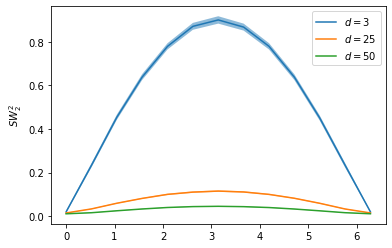

In [ ]:
kappa = 10    

ds = [3, 25, 50]

L = np.zeros((len(ds), len(mus), 100))

thetas = [0,np.pi/6,np.pi/3,np.pi/2,2*np.pi/3,5*np.pi/6,np.pi,
            -5*np.pi/6,-2*np.pi/3,-np.pi/2,-np.pi/3,-np.pi/6, 0]
thetas = np.array(thetas)%(2*np.pi)

thetas[-1] = 2*np.pi



for i, d in enumerate(ds):
    print(d)
    
    mu_target = np.zeros((d,))
    mu_target[0] = 1
    
    v = np.zeros((d,))
    v[1] = 1

    mus = []
    for theta in thetas:
        mus.append(np.zeros((d,)))
        mus[-1][0] = np.cos(theta)
        mus[-1][1] = np.sin(theta)
        # mus.append([np.cos(theta), np.sin(theta), 0])    
        
    for k in range(len(mus)):
        mu = np.array(mus[k])
        
        for j in range(100):
            x0 = rand_von_mises_fisher(mu_target, kappa=10, N=500)
            x1 = rand_von_mises_fisher(mu, kappa=10, N=500)
            sw = sliced_wasserstein(torch.tensor(x0, dtype=torch.float, device=device), 
                                           torch.tensor(x1, dtype=torch.float, device=device), 
                                           1000, device, p=1)
            L[i, k, j] = sw

    m = np.mean(L[i], axis=-1)
    s = np.std(L[i], axis=-1)
    plt.plot(thetas, m, label=r"$d=$"+str(d))
    plt.fill_between(thetas, m-s, m+s,alpha=0.5)
    
plt.ylabel(r"$SW_2^2$")
plt.legend()
plt.show()

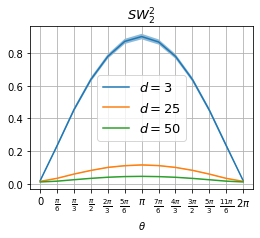

In [ ]:
fig = plt.figure(figsize=(4,3))

for i, d in enumerate(ds):
    m = np.mean(L[i], axis=-1)
    s = np.std(L[i], axis=-1)
    plt.plot(thetas*180/np.pi, m, label=r"$d=$"+str(d)) # + r" $\mu=$["+str(mu[0])+","+str(mu[1])+","+str(mu[2])+"]")
    plt.fill_between(thetas*180/np.pi, m-s, m+s,alpha=0.5)

    plt.xlabel(r"$\theta$") #, fontsize=13)
    labels = ["0", r"$\frac{\pi}{6}$", r"$\frac{\pi}{3}$", r"$\frac{\pi}{2}$", r"$\frac{2\pi}{3}$", r"$\frac{5\pi}{6}$",
            r"$\pi$", r"$\frac{7\pi}{6}$", r"$\frac{4\pi}{3}$", r"$\frac{3\pi}{2}$", r"$\frac{5\pi}{3}$",
            r"$\frac{11\pi}{6}$", r"$2\pi$"]
    plt.xticks(180*thetas/np.pi, labels, fontsize=10)

# ax.set_xticklabels(label)
# plt.ylabel(r"$SSW_2^2$", fontsize=13, rotation=0, labelpad=20)
plt.title(r"$SW_2^2$", fontsize=13)

plt.grid(True)
plt.legend(fontsize=13)
plt.savefig("./SW2_vMF_mus_ds.pdf", format="pdf", bbox_inches="tight")
plt.show()

##### Influence Projections + $\kappa$

In [ ]:
d = 3

x0 = torch.randn((500,d), device=device)
x0 = F.normalize(x0, p=2, dim=-1)

kappas = [1, 10, 20, 50, 100, 200]
mus = np.ones((len(kappas),d))
projs = [1,10,50,100,200,400,500,750,900,1000]

L = np.zeros((len(kappas),len(projs),20))

for i, k in enumerate(kappas):
    mu = mus[i]
    mu = mu/np.linalg.norm(mu)
    x1 = rand_von_mises_fisher(mu,kappa=k,N=500)

    for l, n_projs in enumerate(projs):
        for j in range(20):
            sw = sliced_wasserstein_sphere(x0, torch.tensor(x1, dtype=torch.float, device=device), n_projs, device)
            L[i,l,j] = sw

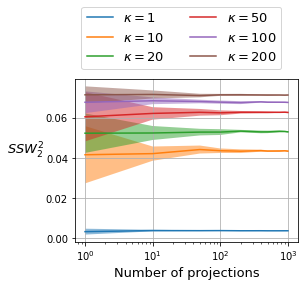

In [ ]:
fig = plt.figure(figsize=(4,3))
    
for i,k in enumerate(kappas):
    m = np.mean(L[i], axis=-1)
    s = np.std(L[i], axis=-1)
    
    plt.plot(projs, m, label=r"$\kappa=$"+str(k)) # + r" $\mu=$["+str(mu[0])+","+str(mu[1])+","+str(mu[2])+"]")
    plt.fill_between(projs, m-s, m+s,alpha=0.5)
    plt.xlabel("Number of projections", fontsize=13)
#     plt.yscale("log")
    plt.xscale("log")

# plt.title(r"$SSW_2^2$", fontsize=13)
plt.ylabel(r"$SSW_2^2$", fontsize=13, rotation=0, labelpad=20)
plt.grid(True)
plt.legend(fontsize=13, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", ncol=2)
plt.savefig("./SSW_projections.pdf", format="pdf", bbox_inches="tight")
plt.show()

##### Influence Projections + Dim

In [ ]:
kappa = 10
ds = [3, 100, 500, 1000, 2000]
# ds = [2000]
projs = [1,10,50,100,200,400,500,600,700,750]

L = np.zeros((len(ds), len(projs), 20))

for i, d in enumerate(ds):
    print(d)
    x0 = torch.randn((500,d), device=device)
    x0 = F.normalize(x0, p=2, dim=-1)
    
    mu = np.ones((d,))
    mu = mu/np.linalg.norm(mu)
    x1 = rand_von_mises_fisher(mu, kappa=kappa, N=500)
    
    for l, n_projs in enumerate(projs):
        print(n_projs)
        for j in range(20):
            t0 = time.time()
            sw = sliced_wasserstein_sphere(x0, torch.tensor(x1, dtype=torch.float, device=device), n_projs, device)
            L[i,l,j] = sw

3
1
10
50
100
200
400
500
600
700
750
100
1
10
50
100
200
400
500
600
700
750
500
1
10
50
100
200
400
500
600
700
750
1000
1
10
50
100
200
400
500
600
700
750
2000
1
10
50
100
200
400
500
600
700
750


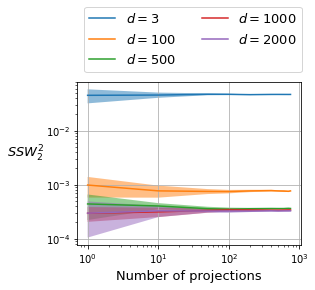

In [ ]:
fig = plt.figure(figsize=(4,3))
# ds = [2000]
for i, d in enumerate(ds):
    m = np.mean(L[i], axis=-1)
    s = np.std(L[i], axis=-1)

    plt.plot(projs, m, label=r"$d=$"+str(d)) # + r" $\mu=$["+str(mu[0])+","+str(mu[1])+","+str(mu[2])+"]")
    plt.fill_between(projs, m-s, m+s,alpha=0.5)
plt.xlabel("Number of projections", fontsize=13)
plt.ylabel(r"$SSW_2^2$", fontsize=13, rotation=0, labelpad=20)
plt.yscale("log")
plt.xscale("log")
    
plt.legend(fontsize=13, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", ncol=2)
plt.grid(True)
plt.savefig("./SSW_d_projections_log.pdf", format="pdf", bbox_inches="tight")
plt.show()

##### Computational Time - Projections

In [10]:
kappa = 10
ds = [3, 100, 500, 1000]
projs = [1,10,50,100,200,400,500,750,900,1000,1250,1500,1750,2000]

L = np.zeros((len(ds), len(projs), 20))

for i, d in enumerate(ds):
    print(d)
    
    mu = np.ones(( d,))
    mu = mu/np.linalg.norm(mu)
    x1 = rand_von_mises_fisher(mu, kappa=kappa, N=500)
    
    for l, n_projs in enumerate(projs):
        # print(n_projs)
        for j in range(20):
            t0 = time.time()
            try:
                sw = sliced_wasserstein_sphere_unif(torch.tensor(x1, dtype=torch.float, device=device), n_projs, device)
                L[i,l,j] = time.time()-t0
            except:
                L[i, l, j] = np.inf


3
100
500
1000


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


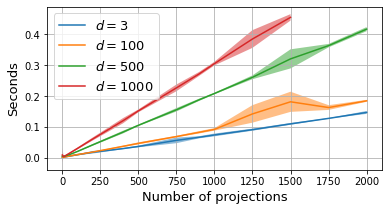

In [11]:
fig = plt.figure(figsize=(6,3))

for i, d in enumerate(ds):
    m = np.mean(L[i], axis=-1)
    s = np.std(L[i], axis=-1)

    plt.plot(projs, m, label=r"$d=$"+str(d)) # + r" $\mu=$["+str(mu[0])+","+str(mu[1])+","+str(mu[2])+"]")
    plt.fill_between(projs, m-s, m+s,alpha=0.5)
    plt.xlabel("Number of projections", fontsize=13)
    plt.ylabel("Seconds", fontsize=13)
    # plt.yscale("log")
    # plt.xscale("log")
    
plt.legend(fontsize=13)
plt.grid(True)
# plt.title("Computational Time", fontsize=13)
plt.savefig("./SW_time_projections2.pdf", format="pdf", bbox_inches="tight")
plt.show()

##### Computational Time - Samples + Dim

In [48]:
kappa = 10
ds = [3, 100, 500, 1000]
samples = [10,50,100,200,500,750,1000,2000,3000]
n_projs = 200

L = np.zeros((len(ds), len(samples), 20))
L_w = np.zeros((len(ds), len(samples), 20))

for i, d in enumerate(ds):
    print(d)
    mu = np.ones((d,))
    mu = mu/np.linalg.norm(mu)
    
    for k, n_samples in enumerate(samples):   
        x1 = rand_von_mises_fisher(mu, kappa=kappa, N=n_samples)
    
        for j in range(20):
            t0 = time.time()
            sw = sliced_wasserstein_sphere_unif(torch.tensor(x1, dtype=torch.float, device=device), n_projs, device)
            L[i,k,j] = time.time()-t0

            # t1 = time.time()
            # ip = x0@torch.tensor(x1, dtype=torch.float, device=device).T
            # M = torch.arccos(torch.clamp(ip, min=-1+1e-5, max=1-1e-5))
            # a = torch.ones(x0.shape[0], device=device) / x0.shape[0]
            # b = torch.ones(x1.shape[0], device=device) / x1.shape[0]
            # w = ot.emd2(a, b, M).item()
            # L_w[i,k,j] = time.time()-t1

            # print(L[i,k,j], L_w[i,k,j])

3
100
500
1000


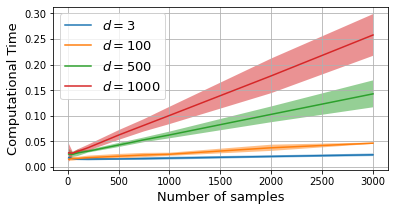

In [49]:
fig = plt.figure(figsize=(6,3))

for i, d in enumerate(ds):
    m = np.mean(L[i], axis=-1)
    s = np.std(L[i], axis=-1)

    plt.plot(samples, m, label=r"$d=$"+str(d)) # + r" $\mu=$["+str(mu[0])+","+str(mu[1])+","+str(mu[2])+"]")
    plt.fill_between(samples, m-s, m+s,alpha=0.5)
    plt.xlabel("Number of samples", fontsize=13)
    plt.ylabel("Computational Time", fontsize=13)
    # plt.yscale("log")
    # plt.xscale("log")
    
plt.legend(fontsize=13)
plt.grid(True)
plt.savefig("./SW_time_samples.pdf", format="pdf", bbox_inches="tight")
plt.show()

#### KL

\begin{equation}
    \mathrm{KL}\big(\mathrm{vMF}(\mu,\kappa)||\mathrm{vMF}(\cdot,0)\big) = \kappa \frac{I_{d/2}(\kappa)}{I_{d/2-1}(\kappa)}+(\frac{d}{2}-1)\log \kappa - \frac{d}{2} \log(2\pi) - \log I_{d/2-1}(\kappa) + \frac{d}{2}\log \pi + \log 2 -\log \Gamma(\frac{d}{2}).
\end{equation}

[1] Davidson, Tim R., et al. "Hyperspherical variational auto-encoders." arXiv preprint arXiv:1804.00891 (2018).

[2] Xu, Jiacheng, and Greg Durrett. "Spherical latent spaces for stable variational autoencoders." arXiv preprint arXiv:1808.10805 (2018).

In [ ]:
def KL(k, d):
    cpt1 = k * iv(d/2, k)/iv(d/2-1, k)
    cpt2 = (d/2-1)*np.log(k)
    cpt3  = -np.log(2*np.pi)*d/2 - np.log(iv(d/2-1, k))
    cpt4 = np.log(np.pi)*d/2 + np.log(2) - np.log(gamma(d/2))
    return cpt1+cpt2+cpt3+cpt4

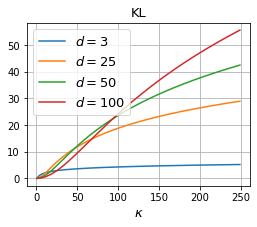

In [ ]:
fig = plt.figure(figsize=(4,3))

for d in [3,25,50,100]:

    x0 = torch.randn((500,d))
    x0 = F.normalize(x0, p=2, dim=-1)

    kappas = range(1,250) # [1,5,10,20,50,100,200,250]
    mus = np.ones((len(kappas),d))

    L = np.zeros((len(kappas)))

    for k in range(len(kappas)):
        L[k] = KL(kappas[k], d)
            
    plt.plot(kappas, L, label=r"$d=$"+str(d)) # + r" $\mu=$["+str(mu[0])+","+str(mu[1])+","+str(mu[2])+"]")
    
plt.xlabel(r"$\kappa$", fontsize=13)
# plt.ylabel("KL", rotation=0, labelpad=20, fontsize=13)
# plt.legend(fontsize=13, bbox_to_anchor=(0,1.02,1,0.2), loc="upper left", ncol=2)
# plt.legend(fontsize=13, bbox_to_anchor=(0.5, -0.075), loc="lower center", ncol=2)
plt.legend(fontsize=13)
# plt.axis("tight")
# plt.tight_layout()
plt.title("KL", fontsize=13)
plt.grid(True)
plt.savefig("./KL.pdf", format="pdf", bbox_inches="tight")
plt.show()

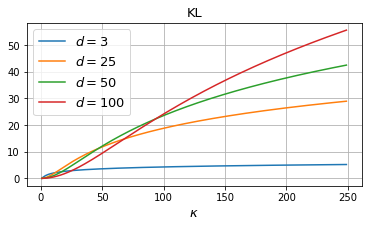

In [ ]:
fig = plt.figure(figsize=(6,3))

for d in [3,25,50,100]:

    x0 = torch.randn((500,d))
    x0 = F.normalize(x0, p=2, dim=-1)

    kappas = range(1,250) # [1,5,10,20,50,100,200,250]
    mus = np.ones((len(kappas),d))

    L = np.zeros((len(kappas)))

    for k in range(len(kappas)):
        L[k] = KL(kappas[k], d)
            
    plt.plot(kappas, L, label=r"$d=$"+str(d)) # + r" $\mu=$["+str(mu[0])+","+str(mu[1])+","+str(mu[2])+"]")
    
plt.xlabel(r"$\kappa$", fontsize=13)
# plt.ylabel("KL", rotation=0, labelpad=20, fontsize=13)
# plt.legend(fontsize=13, bbox_to_anchor=(0,1.02,1,0.2), loc="upper left", ncol=2)
# plt.legend(fontsize=13, bbox_to_anchor=(0.5, -0.075), loc="lower center", ncol=2)
plt.legend(fontsize=13)
# plt.axis("tight")
# plt.tight_layout()
plt.title("KL", fontsize=13)
plt.grid(True)
plt.savefig("./KL.pdf", format="pdf", bbox_inches="tight")
plt.show()